# **Yoga Pose Detection, Classification, and Accuracy Feedback**

This project performs:
1. **Pose Detection**: Detects body landmarks using MediaPipe.
2. **Pose Classification**: Identifies the yoga pose using a pre-trained model.
3. **Pose Accuracy Calculation**: Compares the user's pose to a reference pose and provides accuracy feedback.

---

## **Step 1: Install Required Libraries**
Install MediaPipe and OpenCV for pose detection and image processing.



In [2]:
# Install required libraries
!pip install mediapipe opencv-python-headless

## **Step 2: Import Required Libraries**

We import the following libraries:

- **OpenCV**: For image and video processing.  
- **MediaPipe**: For human pose landmark detection.  
- **NumPy**: For numerical operations like keypoint comparisons.  
- **Colab Patches**: For displaying images in Google Colab.


In [3]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

## **Step 3: Initialize MediaPipe Pose**

We initialize **MediaPipe Pose** to detect and track human body landmarks.  
- `mp_pose.Pose`: A model that processes video frames and identifies keypoints.  
- Parameters:  
  - **`static_image_mode=False`**: Allows video input for real-time tracking.  
  - **`min_detection_confidence=0.5`**: Minimum confidence threshold for detecting a pose.  
  - **`min_tracking_confidence=0.5`**: Minimum confidence threshold for tracking pose landmarks across frames.  


In [4]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Initialize MediaPipe Pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

## **Step 4: Define Helper Functions**

### **1. Calculate Joint Angles**
The `calculate_angle` function computes the angle between three points (e.g., shoulder, elbow, wrist) using their **(x, y)** coordinates.

- **Inputs**:
   - `a`: First point (e.g., shoulder).  
   - `b`: Middle point (e.g., elbow).  
   - `c`: End point (e.g., wrist).  
- **Logic**:
   - The angle is calculated using **arctangent differences** between vectors.  
   - The result is normalized to ensure it remains within **0° to 180°**.  
- **Output**: The angle in degrees.

### **2. Extract Keypoints**
The `extract_keypoints` function retrieves the **landmark coordinates** of specific body parts from MediaPipe's pose detection.

- **Keypoints Extracted**:
   - Left Shoulder  
   - Left Elbow  
   - Left Wrist  
   - Left Hip  
   - Left Knee  
   - Left Ankle  
- **Output**: A dictionary containing normalized (x, y) coordinates of keypoints.  


In [5]:
def calculate_angle(a, b, c):
    """Calculate the angle between three points (a, b, c)."""
    a = np.array(a)  # First point
    b = np.array(b)  # Mid point
    c = np.array(c)  # End point

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

def extract_keypoints(results):
    """Extract keypoints from Mediapipe pose landmarks."""
    landmarks = results.pose_landmarks.landmark
    keypoints = {
        "shoulder": [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y],
        "elbow": [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                  landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y],
        "wrist": [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                  landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y],
        "hip": [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y],
        "knee": [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                 landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y],
        "ankle": [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                  landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y],
    }
    return keypoints

## **Step 5: Process and Analyze a Single Image**

In this step, we:
1. **Load an Input Image**: Use OpenCV to read and process the input yoga image.  
2. **Detect Pose Landmarks**: Use MediaPipe Pose to identify keypoints.  
3. **Calculate Joint Angles**: Compute the angles for joints such as the elbow and knee.  
4. **Provide Feedback**: Overlay the calculated angles on the image and display it.

- **Logic**:
   - Extract **keypoints** for the shoulder, elbow, wrist, hip, knee, and ankle.  
   - Calculate the **elbow and knee angles** using the `calculate_angle` function.  
   - Display feedback with angles on the image using OpenCV.  


Elbow Angle: 170.30° | Knee Angle: 173.89°


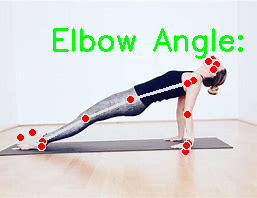

In [6]:
# Load the input image
image_path = "/content/yoga_example.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect Pose
results = pose.process(image_rgb)

# Draw Pose Landmarks
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Extract keypoints and calculate angles
    keypoints = extract_keypoints(results)
    elbow_angle = calculate_angle(keypoints['shoulder'], keypoints['elbow'], keypoints['wrist'])
    knee_angle = calculate_angle(keypoints['hip'], keypoints['knee'], keypoints['ankle'])

    # Feedback
    feedback = f"Elbow Angle: {elbow_angle:.2f}° | Knee Angle: {knee_angle:.2f}°"
    print(feedback)
    cv2.putText(image, feedback, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display Result
cv2_imshow(image)


## **Step 6: Pose Detection and Keypoint Extraction**

In this step, we:
1. **Detect the Pose**: Use **MediaPipe Pose** to identify keypoints (shoulders, elbows, wrists, etc.) from the image.  
2. **Extract Keypoints**: The `extract_keypoints` function normalizes the **(x, y)** coordinates of detected landmarks.

### **Helper Function - Extract Keypoints**:
The function takes the landmarks detected by **MediaPipe** and returns the normalized coordinates as an array.

- **Input**:  
   - `landmarks`: The pose landmarks detected by **MediaPipe Pose**.
  
- **Output**:  
   - **An array** of normalized **(x, y)** coordinates for each keypoint.

```python
def extract_keypoints(landmarks):
    """Extract and normalize keypoints from pose landmarks."""
    keypoints = []
    for landmark in landmarks:
        keypoints.append([landmark.x, landmark.y])  # x and y coordinates
    return np.array(keypoints)


In [19]:
def extract_keypoints(landmarks):
    """Extract and normalize keypoints from pose landmarks."""
    keypoints = []
    for landmark in landmarks:
        keypoints.append([landmark.x, landmark.y])  # x and y coordinates
    return np.array(keypoints)

In [20]:
def calculate_accuracy(reference_keypoints, user_keypoints):
    """Calculate pose similarity accuracy using Euclidean distance."""
    if reference_keypoints.shape != user_keypoints.shape:
        return 0.0  # If shapes don't match, return 0 accuracy

    # Calculate Euclidean distances between corresponding keypoints
    distances = np.linalg.norm(reference_keypoints - user_keypoints, axis=1)

    # Normalize score: lower distance -> higher similarity
    score = max(0, 100 - np.mean(distances) * 100)  # Scale to 0-100%
    return round(score, 2)


## **Step 7: Process Video for Pose Detection and Accuracy Calculation**

In this step, we:
1. **Load the Video**: Use OpenCV to read and process the video frame by frame.
2. **Pose Detection**: Detect and track poses in each frame using **MediaPipe Pose**.
3. **Compare Pose Accuracy**: The first detected pose is stored as a reference, and each subsequent frame is compared to this reference pose.
4. **Display Results**: The pose accuracy is shown on each frame, and the frame is displayed in Google Colab.
5. **Plot Pose Accuracy**: After processing the video, a plot of pose accuracy over time is generated.

### **Code Explanation**:
1. **`cv2.VideoCapture(video_path)`**: Opens the video for processing.
2. **`frame_skip`**: Skips frames to speed up processing.
3. **Pose Detection and Keypoint Extraction**: Each frame's landmarks are extracted using `extract_keypoints`.
4. **Pose Accuracy Calculation**: We compare each frame's pose to the **reference pose** using `calculate_accuracy`.
5. **Feedback and Visualization**: Overlay pose accuracy on each frame and display the frame using `cv2_imshow`.
6. **Final Plot**: After processing the video, we plot the **pose accuracy** over time.


In [ ]:
# Load the video
video_path = "/content/3327959-hd_1920_1080_24fps (1).mp4"
cap = cv2.VideoCapture(video_path)

frame_skip = 5  # Process every 5th frame
frame_count = 0
pose_scores = []  # Store accuracy scores
reference_pose = None  # To store the first detected pose as reference

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video.")
        break

    frame_count += 1
    if frame_count % frame_skip != 0:
        continue  # Skip frames for faster processing

    # Convert to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(frame_rgb)

    # Check for pose detection
    if results.pose_landmarks:
        # Extract keypoints
        user_keypoints = extract_keypoints(results.pose_landmarks.landmark)

        # Set the first detected pose as reference
        if reference_pose is None:
            reference_pose = user_keypoints
            print("Reference Pose Set!")

        # Compare user pose to reference pose
        pose_accuracy = calculate_accuracy(reference_pose, user_keypoints)
        pose_scores.append(pose_accuracy)

        # Display Pose Accuracy on the Frame
        feedback = f"Pose Accuracy: {pose_accuracy:.2f}%"
        cv2.putText(frame, feedback, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Draw landmarks
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Display the processed frame
    cv2_imshow(frame)

cap.release()

# Plot Pose Accuracy
if pose_scores:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pose_scores) + 1), pose_scores, marker='o', color='green')
    plt.title("Frame-wise Pose Accuracy")
    plt.xlabel("Frame")
    plt.ylabel("Pose Accuracy (%)")
    plt.grid()
    plt.show()
else:
    print("No valid pose scores collected.")
